In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cardekho.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(8128, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


Data Cleaning and Feature Selection

In [5]:
# Unique values in categorical columns
for col in ["fuel", "seller_type", "transmission", "owner"]:
    print(f"\n{col} unique values:", df[col].unique())


fuel unique values: ['Diesel' 'Petrol' 'LPG' 'CNG']

seller_type unique values: ['Individual' 'Dealer' 'Trustmark Dealer']

transmission unique values: ['Manual' 'Automatic']

owner unique values: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [7]:
# Map owner to numbers
owner_map = {
    "Test Drive Car": 0,
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4
}
df["owner"] = df["owner"].map(owner_map)

In [8]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70,5.0


In [9]:
df["max_power"].unique()[:20]   # show first 20 unique values

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1'], dtype=object)

In [11]:
# Convert max_power to float
df["max_power"] = pd.to_numeric(df["max_power"], errors="coerce")

# Handle missing values (NaN after conversion)
df["max_power"].fillna(df["max_power"].median())

,max_power
0,74.00
1,103.52
2,78.00
3,90.00
4,88.20
...,...
8123,82.85
8124,110.00
8125,73.90
8126,70.00


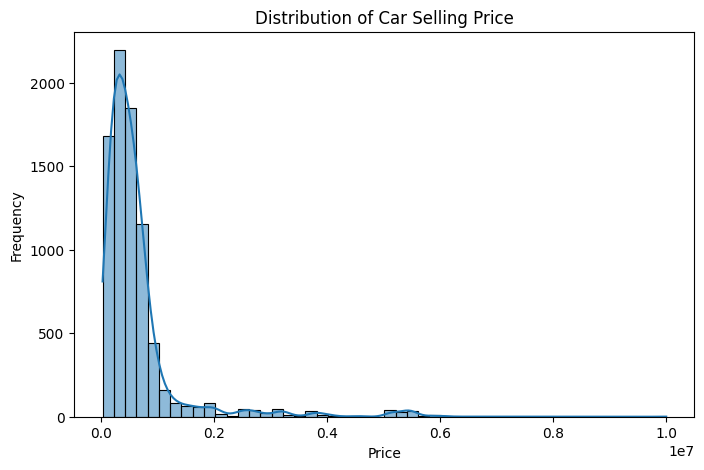

In [12]:
# Selling price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["selling_price"], bins=50, kde=True)
plt.title("Distribution of Car Selling Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

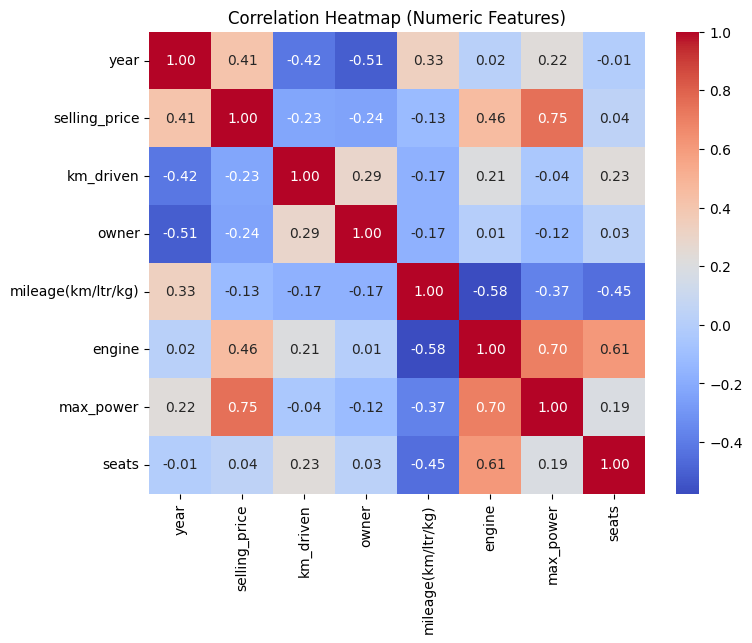

In [13]:
# Corealtion heatmap for numeric functions
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

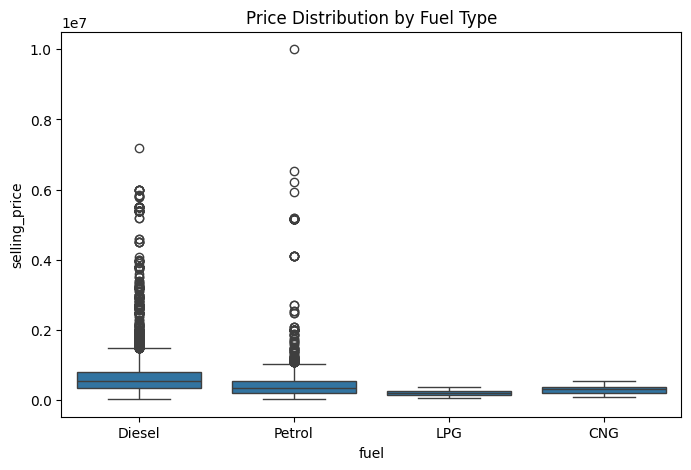

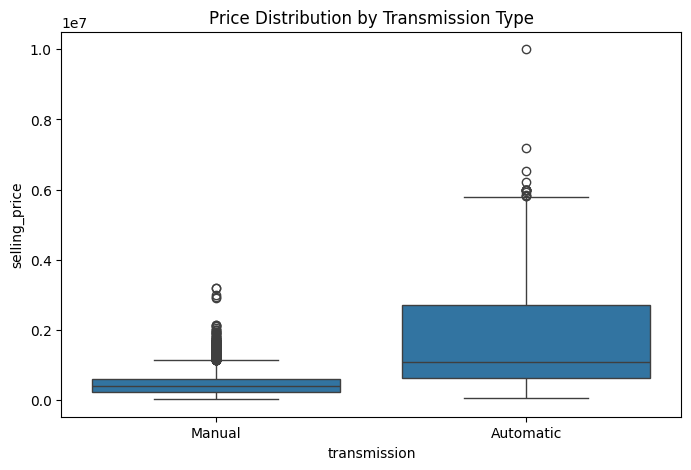

In [15]:
# Categorical features vs price
plt.figure(figsize=(8,5))
sns.boxplot(x="fuel", y="selling_price", data=df)
plt.title("Price Distribution by Fuel Type")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="transmission", y="selling_price", data=df)
plt.title("Price Distribution by Transmission Type")
plt.show()

In [16]:
# Make a copy
df_clean = df.copy()

In [18]:
# Power-to-Engine ratio (avoid division by zero)
df_clean["power_engine_ratio"] = df_clean["max_power"] / df_clean["engine"]
df_clean["power_engine_ratio"].replace([np.inf, -np.inf], np.nan)

,power_engine_ratio
0,0.059295
1,0.069105
2,0.052104
3,0.064470
4,0.067951
...,...
8123,0.069215
8124,0.073677
8125,0.059215
8126,0.050143


In [24]:
# Extract brand from car name
df_clean["brand"] = df_clean["name"].str.split(" ").str[0]

# Drop original 'name' column
df_clean.drop("name", axis=1)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,power_engine_ratio,brand,age
0,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,0.059295,Maruti,11
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,0.069105,Skoda,11
2,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,0.052104,Honda,19
3,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,0.064470,Hyundai,15
4,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,0.067951,Maruti,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0,0.069215,Hyundai,12
8124,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0,0.073677,Hyundai,18
8125,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0,0.059215,Maruti,16
8126,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0,0.050143,Tata,12


In [25]:
# Age of car
current_year = 2025
df_clean["age"] = current_year - df_clean["year"]

In [29]:
# Fill missing numeric features with median
num_cols = df_clean.select_dtypes(include=["float64", "int64"]).columns
for col in num_cols:
    df_clean[col].fillna(df_clean[col].median())

# Fill missing categorical features with mode
cat_cols = df_clean.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df_clean[col].fillna(df_clean[col].mode()[0])


Model Traing and Testing

In [30]:
final_features = [
    "age",
    "km_driven",
    "engine",
    "max_power",
    "power_engine_ratio",
    "fuel",
    "seller_type",
    "transmission",
    "owner",
    "brand"
]

X = df_clean[final_features]
y = df_clean["selling_price"]

In [31]:
# Split before preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
# Separate categorical and numeric features
categorical = ["fuel", "seller_type", "transmission", "owner", "brand"]
numerical = ["age", "km_driven", "engine", "max_power", "power_engine_ratio"]

In [38]:
# Preprocessor: One-hot encode categoricals, scale numericals
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Pipelines for preprocessing
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # fill missing numbers
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # fill missing categories
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Final preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, numerical),
        ("cat", cat_transformer, categorical)
    ]
)

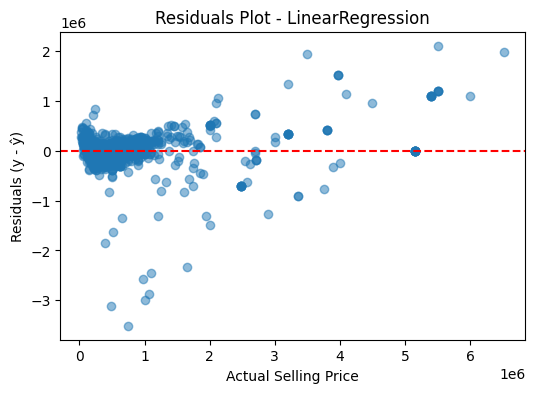

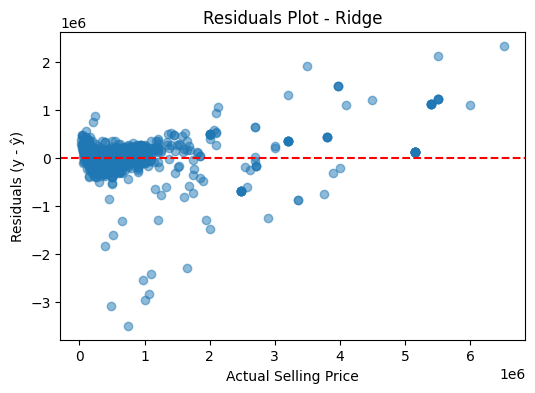

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53278725227426.81, tolerance: 421708954444.7384
  model = cd_fast.sparse_enet_coordinate_descent(


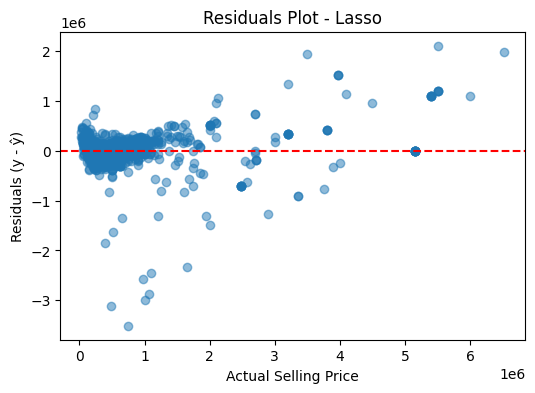

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343499676378769.0, tolerance: 421708954444.7384
  model = cd_fast.sparse_enet_coordinate_descent(


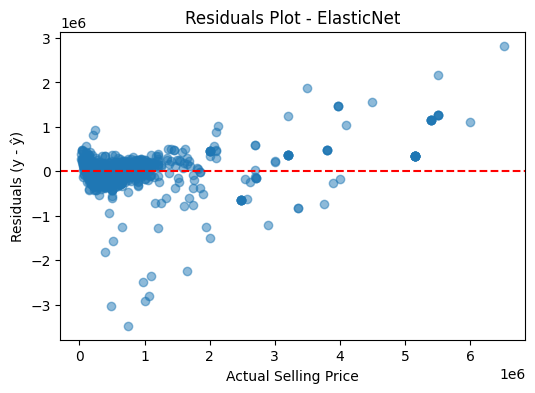

              Model           RMSE        R²
0  LinearRegression  314818.530611  0.848798
1             Ridge  316312.995024  0.847359
2             Lasso  314818.736765  0.848798
3        ElasticNet  320537.330666  0.843255


In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary of models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),   # small alpha avoids underfitting
    "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5)
}

results = []

# Fit and evaluate each model
for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "RMSE": rmse, "R²": r2})

    # Residuals Plot
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_test - y_pred, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Actual Selling Price")
    plt.ylabel("Residuals (y - ŷ)")
    plt.title(f"Residuals Plot - {name}")
    plt.show()

# Results table
results_df = pd.DataFrame(results)
print(results_df)
